## Mobile Money Dashboard
In this assignment, we look at the mobile money graphs as a dashboard and 

In [1]:
import plotly.graph_objs as go
import plotly.offline as pyo
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_renderer
import pandas as pd
import os
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cash_outlet = pd.read_csv('training.csv')

In [3]:
cash_outlet.rename(inplace=True, columns={
    'Q1':'age',
    'Q2':'gender',
    'Q3':'marital status',
    'Q4':'Highest level of education',
    'Q5':'property ownership',
    'Q6':'land ownership',
    'Q7':'personal mobile status',
    'Q8_1':'salaries or wages',
    'Q8_2':'money trading or selling',
    'Q8_3':'money providing a service',
    'Q8_4':'money casual work',
    'Q8_5':'money rental income',
    'Q8_6':'money interests',
    'Q8_7':'money pension',
    'Q8_8':'money social welfare',
    'Q8_9':'money financially dependant',
    'Q8_10':'money no income',
    'Q8_11':'other',
    'Q9':'salary and wages',
    'Q10':'selling things',
    'Q11':'providing a service',
    'Q12':'send money to another country',
    'Q13':'money last sent',
    'Q14':'received money from another country',
    'Q15':'last money received',
    'Q16':'mobile money purchases',
    'Q17':'mobile money bills',
    'Q18':'literacy in kwiswhahili',
    'Q19':'literacy in english'
    
})

In [4]:
cash_outlet.gender= ['male' if each == 1 else 'female' for each in cash_outlet.gender]
cash_outlet.groupby(by='gender').size()

gender
female    3972
male      3122
dtype: int64

In [5]:
cash_outlet.groupby(by='mobile_money_classification').size()

mobile_money_classification
0    1386
1    1778
2     804
3    3126
dtype: int64

In [6]:
cash_outlet['mobile_money_classification'].replace([0,1,2,3],['None','FS_only','MM_only','MM_FS'],inplace=True)

In [7]:
cash_outlet.groupby(by='mobile_money_classification').size()

mobile_money_classification
FS_only    1778
MM_FS      3126
MM_only     804
None       1386
dtype: int64

In [8]:
cash_outlet['Group by age'] = cash_outlet.age.apply(lambda x : int(x/25) * 10)

In [9]:
cash_outlet['marital status'].replace([1,2,3,4],['Married','Divorced','Widowed','Never married'],inplace=True)

In [10]:
cash_outlet.groupby(by='marital status').size()

marital status
Divorced          687
Married          4548
Never married    1181
Widowed           678
dtype: int64

In [11]:
cash_outlet['land ownership'].replace([1,2],['Yes', 'No'],inplace=True)

In [12]:
cash_outlet.groupby(by='land ownership').size()

land ownership
No     5963
Yes    1131
dtype: int64

Running on http://127.0.0.1:8056/
Debugger PIN: 355-424-295
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

/home/puleng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



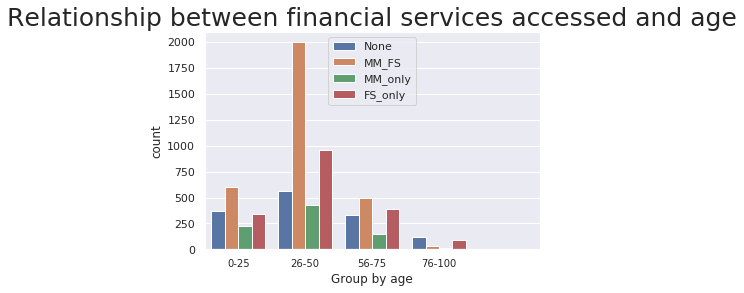

In [13]:
app = dash.Dash()

app.layout = html.Div( children = [
            html.H1('dashoard for mobile money'),
            html.Div('Dash: Web dashboards with python'),
            dcc.Graph(id='mobile money',
                    figure={'data': [
                        sns.countplot(x = 'Group by age', hue = 'mobile_money_classification',data = cash_outlet),
                        plt.legend(loc = 'best'),
                        plt.title("Relationship between financial services accessed and age", fontsize=25),
                        plt.xticks(np.arange(4), ['0-25', '26-50', '56-75', '76-100'], fontsize=10)]}),   

    
#             dcc.Graph(id='mobile money',
#                     figure={'data': [
#                         sns.countplot(x = 'mobile_money_classification', hue = 'gender',data = cash_outlet),
#                         plt.legend(loc = 'best'),
#                         plt.title("Relationship between financial services accessed and gender", fontsize=25),
#                         plt.xticks(np.arange(4), ['None', 'FS_only', 'MM_only', 'MM_FS'])]}),
    
    
#             dcc.Graph(id='histogram', 
#                        figure={sns.countplot(x = 'land ownership', hue = 'mobile_money_classification',data = cash_outlet),
#                             plt.legend(loc = 'best'),
#                             plt.title("Relationship between financial services accessed and age", fontsize=25),
#                             plt.xticks(np.arange(4), ['0-25', '26-50', '56-75', '76-100'], fontsize=10)}),

    
#             dcc.Graph(id='violinegraph', 
#                          figure={sns.violinplot(x='marital status', y='age', data=cash_outlet, hue='mobile_money_classification', dodge=True),
#                             plt.legend(title='MM class', loc = 'upper center'),
#                             plt.title("Relationship between financial services accessed and marital status", fontsize=25)})
                      
])

if __name__ == '__main__':
    app.run_server(debug=True, port=8056)
